### Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

#### Set Params

In [2]:
t = np.array([0.65,0.91,0.95,1.54,1.78,2.02,2.34,2.49,3.41,4.08,6.5,11.18])
y = np.array([0.82,0.86,1.13,2.52,2.56,2.89,4.73,4.27,4.83,3.57,6.03,6.99])
label = ["T2X1","TC21","TX21","TX22","PR13","T2X2","TC23","TX23","TX24","TC25P","DICP","PARP"]

#### Smoothing spline fit to a given set of data points

In [3]:
spl = UnivariateSpline(t,y)
ts = np.linspace(np.min(t)-0.1,np.max(t)+0.1,100)

### Nelson & Siegel

In [4]:
from nelson_siegel_svensson import NelsonSiegelSvenssonCurve
from nelson_siegel_svensson.calibrate import calibrate_ns_ols

#### Extract params given the yield and duration

In [5]:
curve, status = calibrate_ns_ols(t,y,tau0=1.0)
print(curve)

NelsonSiegelCurve(beta0=7.690912071567354, beta1=-9.191398665197006, beta2=-2.626582818798795e-06, tau=1.2240400800892117)


#### Build the N&S curve using the params

In [6]:
y_ = NelsonSiegelSvenssonCurve(curve.beta0,curve.beta1,curve.beta2,0.0,curve.tau,0.0)

### Plotting Results

/Users/nicolastoledo/opt/anaconda3/lib/python3.7/site-packages/nelson_siegel_svensson/nss.py:43: RuntimeWarning: divide by zero encountered in true_divide
  exp_tt2 = exp(-T/tau2)
/Users/nicolastoledo/opt/anaconda3/lib/python3.7/site-packages/nelson_siegel_svensson/nss.py:46: RuntimeWarning: divide by zero encountered in true_divide
  factor3 = (1 - exp_tt2) / (T / tau2) - exp_tt2


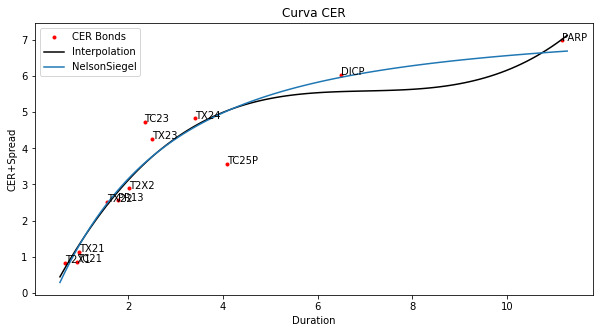

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(t,y,'ro',ms=3,label='CER Bonds')
for i, txt in enumerate(label):
    ax.annotate(txt, (t[i], y[i]))

ax.plot(ts, spl(ts),'k',lw=1.5,label='Interpolation')
ax.plot(ts, y_(ts),label='NelsonSiegel')
ax.set_title('Curva CER')
ax.set_xlabel('Duration')
ax.set_ylabel('CER+Spread')
ax.legend()

